In [11]:
from PIL import Image, UnidentifiedImageError
import io
import contextlib
import os
import numpy as np
from pathlib import Path


In [7]:
path = '/glb/data/ptxd_dash/nlasqh/PhD_GuidedDiff/BoN/assets/compressibility/compress/'
images = [Image.open(path+p) for p in os.listdir(path) if '.jpg' in p]

In [8]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=696x696>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1075x1075>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=608x608>]

In [19]:
[((base_width / float(img.size[0])), int((float(img.size[1]) * float(base_width / float(img.size[0]))))) for img in images]

[(0.735632183908046, 512),
 (0.4762790697674419, 512),
 (0.8421052631578947, 512)]

In [23]:
base_width = 512
# wpercents = [] (base_width / float(img.size[0]))
# hsize = int((float(img.size[1]) * float(wpercent)))
images_re = [img.resize((base_width, int((float(img.size[1]) * float(base_width / float(img.size[0]))))), Image.Resampling.LANCZOS) for img in images]
[img.save(Path(path).joinpath('resized').joinpath(str(i)+'.jpg')) for i, img in enumerate(images)]

[None, None, None]

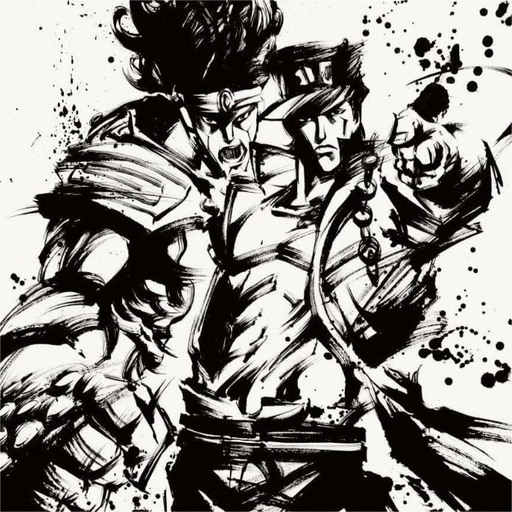

In [25]:
images_re[0]

In [6]:
path = '/glb/data/ptxd_dash/nlasqh/PhD_GuidedDiff/BoN/outputs/uncond2_compress/img_1/images/llama/'
images = [Image.open(path+p) for p in os.listdir(path) if '.png' in p]

In [7]:
# images = [Image.fromarray(image) for image in images]
buffers = [io.BytesIO() for _ in images]
for image, buffer in zip(images, buffers):
    image.save(buffer, format="JPEG", quality=95)
sizes1 = [buffer.tell() / 1000 for buffer in buffers]

In [11]:
np.mean(np.array(sizes1))

88.23153999999998

In [26]:
path = '/glb/data/ptxd_dash/nlasqh/PhD_GuidedDiff/BoN/outputs/c_code_40_b1_r6_compress/img_1/images/llama/'
images = [Image.open(path+p) for p in os.listdir(path) if '.png' in p]

In [27]:
# images = [Image.fromarray(image) for image in images]
buffers = [io.BytesIO() for _ in images]
for image, buffer in zip(images, buffers):
    image.save(buffer, format="JPEG", quality=95)
sizes1 = [buffer.tell() / 1000 for buffer in buffers]

In [28]:
np.mean(np.array(sizes1))

98.62049999999999

In [ ]:
pil_images = images # [Image.fromarray(image) for image in images]
sizes2 = []
with contextlib.ExitStack() as stack:
    buffers = [stack.enter_context(io.BytesIO()) for _ in pil_images]
    for image, buffer in zip(pil_images, buffers):
        image.save(buffer, format="JPEG", quality=95)
        sizes2.append(buffer.tell() / 1000)  # Size in kilobytes

In [ ]:
sizes2

[80.733,
 86.081,
 110.61,
 111.197,
 81.843,
 85.031,
 81.418,
 82.555,
 94.743,
 104.239,
 103.902,
 75.395,
 99.556,
 86.417,
 105.502,
 75.992,
 133.07,
 107.528,
 111.823,
 95.665,
 108.912,
 106.301,
 96.135,
 95.734,
 111.081,
 110.296,
 99.3,
 69.934,
 88.266,
 102.486,
 119.74,
 112.696]

In [ ]:
sizes1 == sizes2

True